# [E-05] 나와 닮은 연예인 찾기

1. 사진 모으기
2. 얼굴 영역 자르기
3. 얼굴 영역 Embedding 추출
4. 연예인들의 얼굴과 거리 비교하기
5. 시각화
6. 회고

## 1. 사진 모으기

* 나의 사진과 연예인들의 사진을 모아서 사용할 예정
* 연예인들 사진의 경우, **정수희 퍼실님**께서 공유해주신 데이터 셋을 이용 (https://aiffel.agit.io/g/300308438/wall/324169302)
* 해당 데이터셋에는 총 282명의 연예인 사진이 있으며, 나의 사진 2장을 포함하여 총 284장의 이미지를 이용

## 2. 얼굴 영역 자르기
* 이미지에서 얼굴 영역을 자름
* image.fromarray를 이용하여 PIL image로 변환한 후, 추후에 시각화에 사용

In [1]:
import face_recognition
import os
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print(len(file_list))

284


* 해당 프로젝트에서 사용할 이미지들의 총 갯수 (284장)
* os.listdir(): 해당 폴더 내의 모든 파일명과 디렉토리명을 리스트의 형식으로 반환
* 284장의 이미지들의 파일명을 file_list라는 변수에 저장

In [2]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

* get_gropped_face(): 이미지 파일에서 얼굴 영역을 가져오는 함수
* face_recognition을 이용하여 이미지 내의 얼굴을 찾기 위해서 Detection 과정을 거치고, 찾은 얼굴 영역을 Crop

In [3]:
def save_cropped_face(dir_path):
    file_list = os.listdir(dir_path)
    
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file)
            face = get_gropped_face(img_path)
            pillow_image = Image.fromarray(face)
            path_to_save = os.path.join(save_path, file)
            pillow_image.save(path_to_save)
            
        except:
            os.remove(img_path)
            print(file, "was removed")

    print('Cropped images are saved')

save_path = os.getenv('HOME')+'/aiffel/face_embedding/images_cropped'
save_cropped_face(dir_path)

산들.jpeg was removed
Cropped images are saved


* save_cropped_face(): get_gropped_face() 함수를 이용하여 얼굴 영역을 자르고, 해당 얼굴 영역을 이미지로 저장하는 함수
* try, except 구문을 이용하여, 얼굴 인식이 안되는 사진을 삭제 (얼굴 인식이 안되는 이미지가 남아있을 경우, 추후에 문제가 발생하기 때문에 삭제)
* 얼굴 영역을 자른 이미지를 images_cropped 폴더에 저장 (해당 이미지는 마지막 시각화 부분에서 사용할 예정)

In [4]:
import glob

files = glob.glob(os.path.join(save_path, '*.png'))
for file in files:
    if not os.path.isdir(file):
        src = os.path.splitext(file)
        os.rename(file, src[0] + '.jpg')

In [5]:
files = glob.glob(os.path.join(save_path, '*.jpeg'))
for file in files:
    if not os.path.isdir(file):
        src = os.path.splitext(file)
        os.rename(file, src[0] + '.jpg')

* 기존 파일들의 확장자가 jpg, jpeg, png로 다양함
* 마지막에 get_nearest_image() 함수에서 이미지들을 불러올때, '*.jpg'라는 형식을 사용하기 때문에, 모든 이미지 파일의 확장자를 jpg로 변환

## 3. 얼굴 영역 Embedding 추출
* 이미지의 얼굴 영역으로부터 face_embedding 벡터를 구함
* 디렉토리 안에 있는 이미지들로부터 여러 얼굴의 face_embedding을 구한 후, 딕셔너리의 형태로 저장

In [6]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

* 얼굴 영역으로부터 얼굴 embedding 벡터를 구하는 함수

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면 len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    print("Embedding dictionary was made")
    return embedding_dict

# 내 사진의 임베딩 딕셔너리 출력
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['박창근']

Embedding dictionary was made


array([-0.04752361,  0.08178065,  0.055006  , -0.06244087, -0.11203759,
       -0.00892638, -0.11183968, -0.1327256 ,  0.09329844, -0.11302678,
        0.14734524, -0.06010322, -0.19043528, -0.06974995, -0.05375371,
        0.20316562, -0.21368352, -0.13804342,  0.01402499, -0.03174347,
        0.05201137,  0.02902356, -0.00946602,  0.0300192 , -0.08043143,
       -0.33123124, -0.09564059, -0.06245381,  0.01134226, -0.06181537,
       -0.09379838,  0.02370895, -0.19832608, -0.00726664,  0.01855473,
        0.07909881, -0.02351797, -0.06399411,  0.15250884, -0.02680622,
       -0.22392538,  0.07106514,  0.07948457,  0.19749814,  0.24220455,
        0.05846664,  0.00257578, -0.12410516,  0.09130763, -0.16929853,
        0.04251226,  0.12962191,  0.05574261,  0.03989954, -0.03840408,
       -0.15203115,  0.00436745,  0.04029785, -0.12824745,  0.00502464,
        0.10038988, -0.10148847, -0.03113605, -0.03206966,  0.22436579,
        0.04296283, -0.10617654, -0.23288092,  0.10703269, -0.19

* 디렉토리 안에 있는 모든 이미지의 embedding 딕셔너리를 구하는 함수
* 해당 딕셔너리를 이용하여 두 이미지 사이의 embedding 벡터 거리를 구할 예정
* 해당 함수 내에서 if문을 사용하는 이유는, 얼굴 영역이 제대로 detect되지 않으면, embedding의 길이가 0인 경우가 발생하기 때문에, 해당 이미지를 제거하기 위해서 사용

## 4. 연예인들의 얼굴과 거리 비교하기
* 이미지들 간의 embedding 벡터의 거리를 구함
* 거리를 비교하여 내 사진 속 얼굴과 가장 가까운 연예인 순위를 출력

In [8]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(get_distance('박창근', '박창근2'))

0.4582174323890295


* get_distance(): 두 이미지 사이의 embedding 벡터 거리를 구하는 함수
* 해당 함수를 이용하여 내 사진들끼리 얼굴 embedding 벡터 거리를 계산
* 아마도, 촬영 각도와 표정 등이 비슷한 사진을 이용하면, 더 좋은 점수를 얻을 수 있을거라고 판단

In [9]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

* get_sort_key_func(): name1과 name2의 거리를 비교하는 함수
* name1은 미리 지정하고, name2는 호출시에 함수 내부에서 인자로 받음

In [10]:
import pandas as pd

def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    rank, name, dist = [], [], []
    idx = 1
    
    for i in range(top+1):
        if i == 0 :
            continue
        elif sorted_faces[i][0].startswith('박창근'):
            continue
        else:
            rank.append(idx)
            name.append(sorted_faces[i][0])
            dist.append(sort_key_func(sorted_faces[i][0]))
            idx += 1
    
    data = {'Rank': rank, 'Name': name, 'Distance': dist}
    return pd.DataFrame(data)

* get_nearest_face(): 거리가 가장 가까운 순으로 출력해주는 함수
* 해당 함수를 이용하여, 나의 이미지와 거리가 가까운 이미지들을 1위부터 6위까지 출력
* if 조건문과 elif 조건문을 이용하여, 나의 이미지를 제외시키고, 나머지 이미지들 중에서 거리가 가까운 순으로 출력

In [11]:
get_nearest_face('박창근')

,Rank,Name,Distance
0,1,하현우,0.380451
1,2,씨잼,0.395774
2,3,디오,0.411860
3,4,이승철,0.412597
4,5,목진화,0.413433
5,6,박건우,0.425986


* '박창근' 이미지와 거리가 가까운 이미지들을 출력
* 가까운 순위, 이름, 거리를 함께 출력

In [12]:
# 다른 사진으로 테스트
get_nearest_face('박창근2')

,Rank,Name,Distance
0,1,박재범,0.405490
1,2,아이즈원조유리,0.411419
2,3,b1a4진영,0.413730
3,4,윤아,0.430653
4,5,트와이스다현,0.432694
5,6,유노윤호,0.443161


* '박창근2' 이미지와 거리가 가까운 이미지들을 출력
* 가까운 순위, 이름, 거리를 함께 출력

## 5. 시각화

### 5.1. 유사도 계산

In [13]:
df_1 = get_nearest_face('박창근')
df_1['Similarity'] = 1 - df_1['Distance']
df_1['Score'] = (df_1['Similarity'] * 100).round().astype(int)
df_1

,Rank,Name,Distance,Similarity,Score
0,1,하현우,0.380451,0.619549,62
1,2,씨잼,0.395774,0.604226,60
2,3,디오,0.411860,0.588140,59
3,4,이승철,0.412597,0.587403,59
4,5,목진화,0.413433,0.586567,59
5,6,박건우,0.425986,0.574014,57


* similarity는 1에서 거리를 뺀 값을 저장
* score는 similarity에 100을 곱한 값으로 환산하여 저장
* '박창근' 이미지와 거리가 가까운 이미지들의 유사도와 점수를 출력

In [14]:
df_2 = get_nearest_face('박창근2')
df_2['Similarity'] = 1 - df_2['Distance']
df_2['Score'] = (df_2['Similarity'] * 100).round().astype(int)
df_2

,Rank,Name,Distance,Similarity,Score
0,1,박재범,0.405490,0.594510,59
1,2,아이즈원조유리,0.411419,0.588581,59
2,3,b1a4진영,0.413730,0.586270,59
3,4,윤아,0.430653,0.569347,57
4,5,트와이스다현,0.432694,0.567306,57
5,6,유노윤호,0.443161,0.556839,56


* '박창근2' 이미지와 거리가 가까운 이미지들의 유사도와 점수를 출력

### 5.2. Top 5 이미지 출력

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_nearest_image(name):
    df = get_nearest_face(name)
    df['Similarity'] = 1 - df['Distance']
    df['Score'] = (df['Similarity'] * 100).round().astype(int)
    
    fig = plt.figure(figsize=(10, 5))
    rows, cols = 1, 6
    i = 1
    
    name_list = [name] + list(df['Name'])
    score_list = ['My Photo'] + list(df['Score'])
    
    for name in name_list:
        if i == 7:
            break
        dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_cropped'
        img_path = os.path.join(dir_path, name + '.jpg')
        img = mpimg.imread(img_path)
        ax = fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        plt.axis("off")
        ax.set_title(score_list[i-1])
        i += 1

    plt.show()

* get_nearest_image() 함수는, 거리가 가까운 순으로 top5 이미지를 출력하는 함수
* similarity와 score는 앞에서 구한 방식과 동일
* 기준이 되는 이미지와 거리가 가까운 이미지 5개, 총 6개의 이미지를 출력

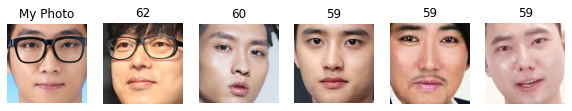

In [16]:
get_nearest_image('박창근')

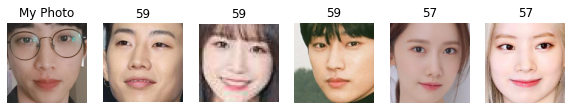

In [17]:
get_nearest_image('박창근2')

* 인자로 주어진 '박창근', '박창근2' 이미지와 거리가 가까운 순서대로 score와 함께 이미지를 출력

---
## 6. 회고
  
  
* **데이터 준비**: 처음 프로젝트를 진행할 당시, 데이터를 어떻게 준비할지에 대해서 걱정이 많았다. 다행이도 정수희 퍼실님께서 아지트에 공유해주신 덕분에, 쉽게 프로젝트를 진행할 수 있었다. 이 과정에서, 데이터를 준비하는 것은 모델을 어떻게 만들지, 학습을 어떻게 시킬지, 하이퍼 파라미터를 어떻게 설정할지 고민하는 것 만큼 중요하고 어려운 일이라는 것을 깨닫게 되었다. 노드를 진행하면서, 어쩌면 데이터 준비와 데이터 전처리 과정이 모델을 설계하고 학습하는 과정보다 더 중요하다고 말할 수 있지 않을까 생각이 든다.
* **데이터 전처리**: 데이터 전처리 과정에서 어려움을 많이 느꼈다. 처음에 노드를 진행할 당시, 이미지들이 저장되어있는 디렉토리 위치가 **aiffel/face_embedding/celebrity/celebrity** 였는데, 이유는 잘 모르겠지만, 이미지를 읽고 크롭된 이미지를 따로 저장하는 과정에서 모든 이미지들이 예외처리 코드 부분을 수행했다. 여러차례 시행착오를 거치다가, 디렉토리 위치를 **aiffel/face_embedding/celebrity**로 변경한 후 코드를 실행해보니 정상적으로 작동했다. 디렉토리 위치도 정확하게 입력했는데, 어떤 문제가 있었던건지는 잘 모르겠다.
* **embedding 벡터 거리 계산**: 내 이미지로 안경의 모습이 다르고, 얼굴형이나 모습의 차이가 있는 이미지 2개를 선택했다.('박창근'은 15년도에 촬영한 사진이고, '박창근2'는 18년도에 촬영한 사진임) 두 이미지의 embedding 벡터 거리 차이는 약 0.46으로 측정되었다. 다른 연예인 이미지와의 거리가 더 짧았다. 아마도, 전체적인 얼굴의 각도나 위치 등이 비슷한 이미지를 사용한다면 내 이미지 사이의 거리를 더 짧게 만들 수 있을거라고 예측된다. 표정을 비슷하게 한다면 거리가 더 짧게 측정될거라고 예측한다.
* **닮은 연예인 찾기**: 가장 score가 높은 이미지는 하현우였다. 하현우 이미지는 내가 봐도 비슷하다고 생각된다. 그러나, '박창근2'의 이미지의 경우, 여자 연예인 이미지의 score가 높았다. 특히 박재범 이미지의 score가 59점으로 측정이 되었는데, 이 과정에서 프로젝트에 대한 신뢰도가 많이 떨어지지 않았나 생각된다.

---

* 해당 프로젝트를 진행하면서, 재밌다는 생각도 들었지만, 결과를 신뢰할 수 있을까에 대한 고민이 많았다. 지난 NLP 노드와는 다르게, CV 노드는 진행할때마다 재밌는 것 같다. 추후에 CV와 NLP 중에 선택해야하는 상황이 온다면, 고민없이 CV를 선택하지 않을까 생각이 들 정도로 둘의 흥미 차이는 크다.